In [32]:
from itertools import product, combinations, cycle
from functools import reduce
from math import prod

In [33]:
# fname = 'example.txt'
# fname = 'input.txt'
fname = 'example2.txt'
        
with open(fname) as f:
    lines = f.readlines()

# [(on, [int(num) for num in rang.replace('x=', '').replace('y=', '').replace('z', '').replace('=', '').split('..') for rang in xyz.split(',')]) for on, xyz in [line.strip().split(' ') for line in lines]]

onoffs, ranges = [], []
# for line in lines[0:20]:
for line in lines:
    onoff, xyz = line.strip().split(' ')
    ranges_letters = xyz.split(',')
    range_3d = tuple([tuple(int(val) for val in range_letter.split('=')[1].split('..')) for range_letter in ranges_letters])
    onoffs.append(onoff)
    ranges.append(range_3d)

instructions = list(zip(onoffs, ranges))
# instructions

In [34]:
def single_range_intersection(r1, r2):
    # https://scicomp.stackexchange.com/a/26260
    low, high = 0, 1 # assuming in order
    if len(r1) != 2 or len(r2) != 2:
#         print(r1, r2)
        return []
    if r2[low] > r1[high] or r1[low] > r2[high]:
        return [] # no intersection
    else:
        return (max(r1[low], r2[low]), min(r1[high], r2[high]))
    

single_range_intersection((0, 2), (2, 4)) # NOTE THIS EDGE CASE

(2, 2)

In [35]:
def range_intersection(range_1, range_2):
#     x1, y1, z1 = range_1
#     x2, y2, z2 = range_2
    return [single_range_intersection(*ranges) for ranges in zip(range_1, range_2)]

r1 = [(-82717, -58814), (9792, 34867), (31729, 41188)]
r2 = [(-62226, -36572), (-17931, -2307), (64240, 74646)]

test_range_intersections = range_intersection(r1, r2)
test_range_intersections

[(-62226, -58814), [], []]

In [36]:
def range_intersection_idxs(idx_1, idx_2):
    return [single_range_intersection(*ranges) for ranges in zip(ranges[idx_1], ranges[idx_2])]

test_range_intersections = range_intersection_idxs(0, 1)
test_range_intersections

[(-5, 5), (-27, 21), (-14, 33)]

In [37]:
def intersection_size(intersection_3d):
    # TODO: is the '+1' correct
    return prod([max(rang)-min(rang)+1 if rang else 0 for rang in intersection_3d])


In [38]:
# brute-force calculate all w-way intersections, 2 <= w <= N 

# w_way_ints = {}
# for way in range(2,20+1):
#     print(way)
#     w_way_ints[way] = set()
#     for combs in combinations(ranges, r=way):
        
#         way_int = reduce(range_intersection, combs)
#         if not [] in way_int:
#             w_way_ints[way].add(frozenset(set([ranges.index(ran) for ran in combs])))

# for ww in w_way_ints:
#     print(ww, len(w_way_ints[ww]))

In [39]:
# w_way_ints = {}
# w_way_ints[1] = set(tuple(el) for el in list(range(len(ranges))))
# for way in range(2,2+1):
#     print(way)
#     w_way_ints[way] = set()
#     for combs in w_way_ints[way - 1]:
#         for ii in range(len(ranges)):      
#             way_int = reduce(range_intersection_idxs, combs + [ii])
#             if not [] in way_int:
#                 w_way_ints[way].add(frozenset(combs + [ii]))

# for ww in w_way_ints:
#     print(ww, len(w_way_ints[ww]))

In [58]:
debug_print = False

for ii in range(len(ranges)):
# for ii in range(10):
    print(f"testing set {ii}") 
    # test intersections with the sets before it only

    used_previous = set(range(ii))
    for way in range(2, ii+2):
        if debug_print: print(f"\ttesting {way}-way intersections")
        eligible = set(range(ii)).intersection(used_previous)
        if debug_print: print(f"\teligible: {eligible}")
        used_current = set()
#         for combs in combinations(eligible, r=way): # TODO: fix this, skips the first two-way between 0 and 1
        for comb in combinations(eligible, r=(way-1)): # TODO: fix this, skips the first two-way between 0 and 1
            
            full_comb = tuple(list(comb) + [ii]) # including ii, the current one
            if debug_print: print(f"\t\t combination {full_comb}")
            
#             way_int = reduce(range_intersection_idxs, full_comb) # can't use indices for intermediate results
            way_int = reduce(range_intersection, [ranges[idx] for idx in full_comb])
            if not [] in way_int:
                # if a real intersection
                #w_way_ints[way].add(frozenset(combs + [ii]))
                used_current.update(comb) # why you no update?
                if debug_print: print(f"\t\t yes, {used_current=}")
            else:
                if debug_print: print("\t\t no")
        
        if debug_print: print(f"\tall intersecting with {ii}: {used_current}")
        if not used_current:
            # if no w-way intersections, definitely no w+1, ... way intersections
#             if debug_print: print(f"\tNO {way}-WAY INTERSECTIONS, SKIPPING REMAINING...")
            print(f"\tNO {way}-WAY INTERSECTIONS, SKIPPING REMAINING...")    
            break
        used_previous = used_current


testing set 0
testing set 1
testing set 2
testing set 3
testing set 4
	NO 2-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 5
	NO 6-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 6
	NO 3-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 7
	NO 7-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 8
	NO 2-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 9
	NO 8-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 10
	NO 2-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 11
	NO 2-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 12
	NO 3-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 13
	NO 3-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 14
	NO 3-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 15
	NO 3-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 16
	NO 2-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 17
	NO 2-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 18
	NO 4-WAY INTERSECTIONS, SKIPPING REMAINING...
testing set 19
	NO 2

In [49]:
# reduce(range_intersection_idxs, (0, 1, 2))
reduce(range_intersection, [ranges[idx] for idx in (0, 1, 2)])

[(-5, -1), (-11, 21), (-10, 33)]

In [18]:
set(range(10)).intersection(set(range(4)))

{0, 1, 2, 3}

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


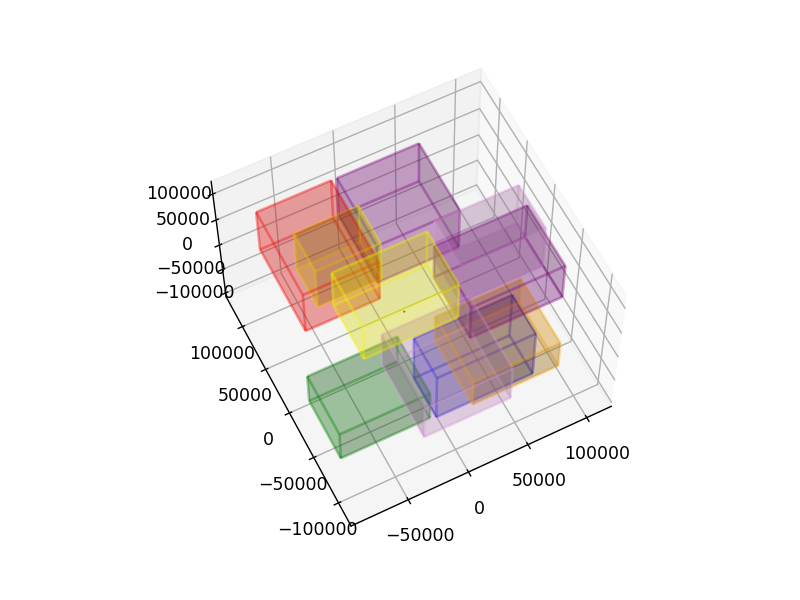

C:\Users\jacob\AppData\Local\Temp/ipykernel_13424/2223576996.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [10]:
# https://codereview.stackexchange.com/q/155585

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.set_aspect("equal")

def x_y_edge(x_range, y_range, z_range, color):
    xx, yy = np.meshgrid(x_range, y_range)

    for value in [0, 1]:
        zz = np.zeros_like(xx)
        zz[:,:] = z_range[value]
        
        ax.plot_wireframe(xx, yy, zz, color=color, alpha=0.2)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def y_z_edge(x_range, y_range, z_range, color):
    yy, zz = np.meshgrid(y_range, z_range)

    for value in [0, 1]:
        xx = np.zeros_like(yy)
        xx[:,:] = x_range[value]

        ax.plot_wireframe(xx, yy, zz, color=color, alpha=0.2)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def x_z_edge(x_range, y_range, z_range, color):
    xx, zz = np.meshgrid(x_range, z_range)

    for value in [0, 1]:
        yy = np.zeros_like(zz)
        yy[:,:] = y_range[value]

        ax.plot_wireframe(xx, yy, zz, color=color, alpha=0.2)
        ax.plot_surface(xx, yy, zz, color=color, alpha=0.2)

def rect_prism(x_range, y_range, z_range, color="r"):
    x_y_edge(x_range, y_range, z_range, color)
    y_z_edge(x_range, y_range, z_range, color)
    x_z_edge(x_range, y_range, z_range, color)


def run():
#     rect_prism(np.array([-1, 1]),
#                np.array([-1, 1]),
#                np.array([-1, 1]))

    colors = ["red", "blue", "green", "yellow", "plum", "purple", "orange"]
    for col, ran in zip(cycle(colors), ranges[:20]):
        rect_prism(*np.array(ran), col)
#     rect_prism(*np.array(range_intersection(ranges[0], ranges[1])), color="b")
    plt.show()

run()